In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## 1. Чтение данных

In [65]:
df = pd.read_csv('kicksharing.csv', parse_dates=['created_dttm', 'book_start_dttm', 'book_end_dttm', 'local_book_start_dttm'])

In [66]:
df.head(10)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN
5,277397094,5247768,M,42,NaN,NaN,МОСКВА,7.49,50.0,300.0,SL,0.016090,2024-09-10 09:40:18,2024-09-10 09:40:24.036000,2024-09-10 09:41:03.644495,3,2024-09-10 09:40:24.036000,0.00,NaN,NaN
6,273528957,801272780,F,19,NaN,NaN,РЕСП ТАТАРСТАН,7.49,30.0,300.0,SL,4.086853,2024-09-03 14:10:29,2024-09-03 14:10:34.524349,2024-09-03 14:21:25.119585,3,2024-09-03 14:10:34.524349,112.39,28.00,NaN
7,265062394,866880584,M,38,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,2.370597,2024-08-03 03:09:35,2024-08-03 03:09:38.493851,2024-08-03 03:18:47.841493,5,2024-08-03 05:09:38.493851,89.90,12.99,NaN
8,351562880,762053500,M,19,NaN,NaN,НОВОСИБИРСКАЯ ОБЛ,5.99,30.0,300.0,E,0.101272,2024-10-04 10:45:16,2024-10-04 10:45:20.457000,2024-10-04 10:47:39.863967,7,2024-10-04 14:45:20.457000,47.97,4.80,NaN
9,269365210,161703813,M,31,UGR,MAR,ЧЕЛЯБИНСКАЯ ОБЛ,6.49,30.0,300.0,E,1.487792,2024-08-19 14:35:17,2024-08-19 14:35:20.199325,2024-08-19 14:42:53.835731,5,2024-08-19 16:35:20.199325,81.92,81.92,NaN


## 2. EDA

In [17]:
df.shape

(396749, 20)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 396749 non-null  int64         
 1   party_rk                 396749 non-null  int64         
 2   gender_cd                393828 non-null  object        
 3   age                      396749 non-null  int64         
 4   education_level_cd       190059 non-null  object        
 5   marital_status_cd        217729 non-null  object        
 6   lvn_state_nm             362572 non-null  object        
 7   minute_cost              396749 non-null  float64       
 8   activation_cost          396749 non-null  float64       
 9   hold_amount              396749 non-null  float64       
 10  transport_model          396749 non-null  object        
 11  distance_km              396749 non-null  float64       
 12  created_dttm    

In [19]:
df.describe()

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,book_time_zone_cd,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
count,3.967490e+05,3.967490e+05,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,366992.000000,21948.000000
mean,2.892236e+08,5.988426e+08,31.544006,7.288688,42.593226,299.983869,3.681031,3.536155,127.647694,37.516121,127.789319
std,3.813458e+07,3.311675e+08,9.434545,1.289492,11.989974,1.939153,141.862349,1.209075,100.122365,75.208560,496.812143
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,0.000000,0.000000,-161.940000,1.000000
25%,2.618150e+08,2.962323e+08,24.000000,6.490000,30.000000,300.000000,0.941054,3.000000,80.840000,11.240000,43.000000
50%,2.704367e+08,6.110092e+08,31.000000,7.490000,50.000000,300.000000,1.729883,3.000000,103.940000,18.730000,62.000000
75%,3.432678e+08,8.646921e+08,37.000000,8.220000,50.000000,300.000000,3.063694,3.000000,142.100000,35.060000,81.000000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,56012.640308,12.000000,5627.640000,3185.000000,55429.360970


In [20]:
# Проверка пропусков
df.isnull().sum()

order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

In [36]:
# Проверка уникальных значений и дубликатов
df.nunique()

order_rk                   396749
party_rk                    64052
gender_cd                       2
age                            77
education_level_cd              5
marital_status_cd               5
lvn_state_nm                  212
minute_cost                   547
activation_cost                10
hold_amount                     3
transport_model                14
distance_km                384385
created_dttm               387224
book_start_dttm            396745
book_end_dttm              396749
book_time_zone_cd              13
local_book_start_dttm      396746
nominal_price_rub_amt       16713
loyalty_accrual_rub_amt     18483
loyalty_accrual_bns_amt      1858
dtype: int64

In [ ]:
# Посмотрю на распределение данных в датасете

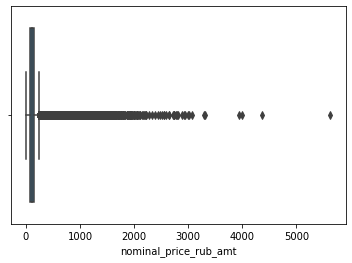

In [22]:
# 1. Стоимость поездки
sns.boxplot(x=df['nominal_price_rub_amt'])

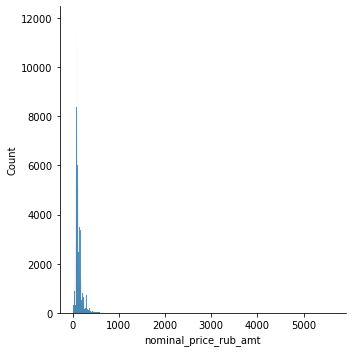

In [31]:
sns.displot(df['nominal_price_rub_amt'])

In [ ]:
# Сильно скошенное вправо распределение: много пользователей платят в районе медианного значения - около 103 рублей за поездку,
    # очень редко платят крупные суммы (более 500 рублей) и маленькие суммы (меньше медианы)
# Значения 0 рублей - либо явные выбросы (предположительно, кто-то взял самокат и передумал ехать - завершил поездку в течение 1 минуты),
    # либо поездка была оплачена целиком бонусами

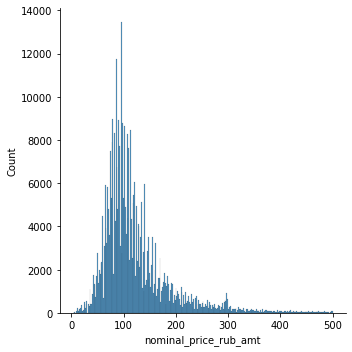

In [55]:
# Отфильтруем "выбросы" для дальнейшего анализа данных
df_nominal_price_filtered = df.query('nominal_price_rub_amt > 0 & nominal_price_rub_amt < 500')
sns.displot(df_nominal_price_filtered['nominal_price_rub_amt'])

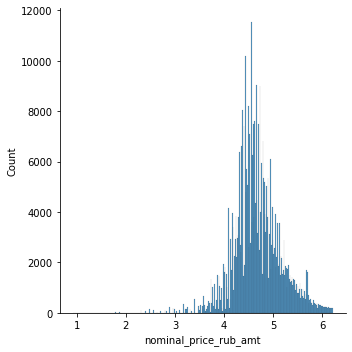

In [56]:
# Логарифм стоимости поездки - получение симметричного распределения
nominal_price_filtered_log = np.log(df_nominal_price_filtered['nominal_price_rub_amt'])
sns.displot(nominal_price_filtered_log)

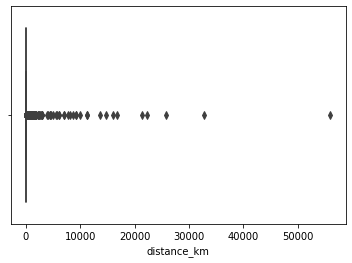

In [52]:
# 2. Километраж поездки
sns.boxplot(x=df['distance_km'])              

In [ ]:
# Это также сильно скошенное вправо распределение, имеющее выбросы 

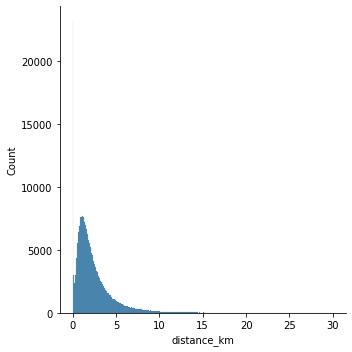

In [62]:
# В данных присутствуют явные выбросы - километраж поездок, измеряемый сотнями и тысячами км, а также 0 км,
# при том, что медианное значение - около 1.7 км
distance_km_filtered = df.query('distance_km < 30')['distance_km']
sns.displot(distance_km_filtered)

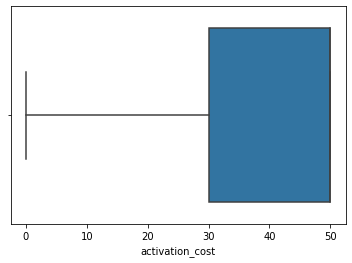

In [23]:
# 3. Стоимость активации самоката
sns.boxplot(x=df['activation_cost'])

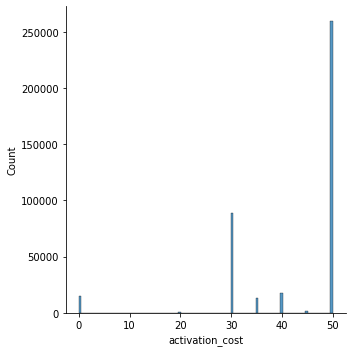

In [32]:
sns.displot(df['activation_cost'])

In [ ]:
# Видно, что стоимость активации самоката стоит от 30 до 50 рублей, для большинства пользователей - 50 рублей.
# В некоторых случаях 0 рублей - скорее всего, это пользователи, которые обладают специальной подпиской.

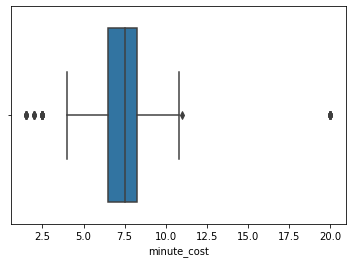

In [24]:
# Стоимость минуты
sns.boxplot(x=df['minute_cost'])

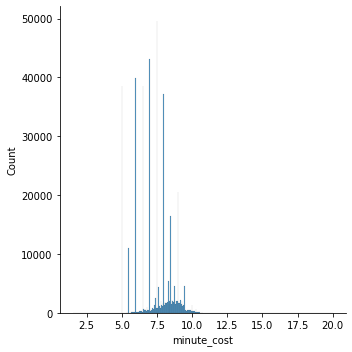

In [33]:
sns.displot(df['minute_cost'])

In [ ]:
# Медианная стоимость минуты - 7.5 рублей
# В данных есть явные выбросы - 20 рублей и ниже 2.5 рублей

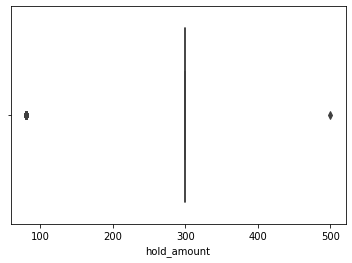

In [26]:
# Размер суммы, которая замораживается на счете
sns.boxplot(x=df['hold_amount'])

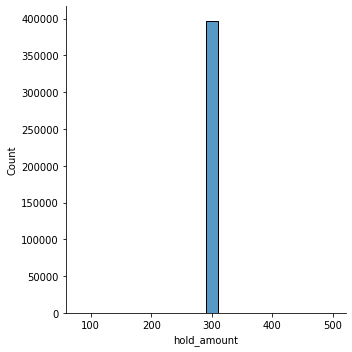

In [59]:
# Это фиксированное значение - 300 рублей, с выбросами по краям
sns.displot(df['hold_amount'])

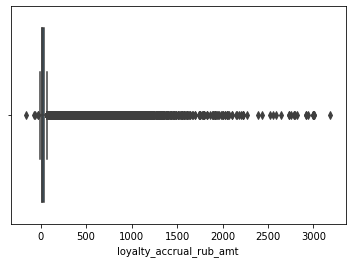

In [29]:
# Размер выплаченного кэшбека
sns.boxplot(x=df['loyalty_accrual_rub_amt'])

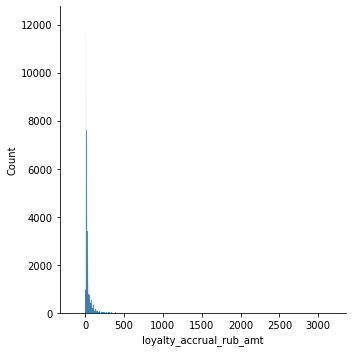

In [60]:
sns.displot(df['loyalty_accrual_rub_amt'])

In [ ]:
# Форма распределения похожа на стоимость поездки, что вполне логично - чем больше стоимость поездки, тем больше кэшбек

In [93]:
# Логарифм кэшбека
loyalty_accrual_rub_amt_log = np.log(df.loyalty_accrual_rub_amt)

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


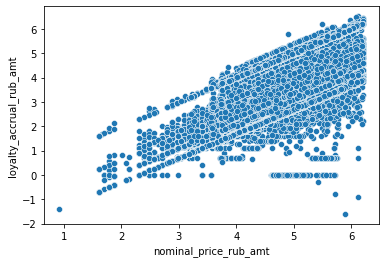

In [94]:
sns.scatterplot(nominal_price_filtered_log, loyalty_accrual_rub_amt_log)

In [ ]:
# Действительно, наблюдается положительная корреляция между стоимостью поездки и кэшбеком

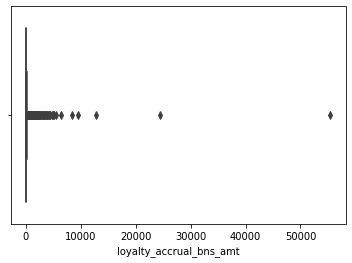

In [30]:
# Размер выплаченного кэшбека в бонусах
sns.boxplot(x=df['loyalty_accrual_bns_amt'])

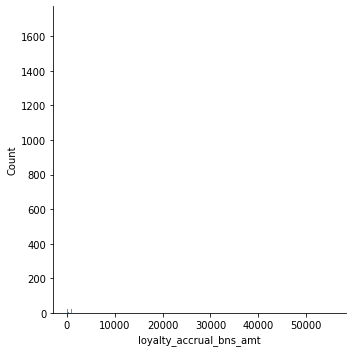

In [61]:
sns.displot(df['loyalty_accrual_bns_amt'])

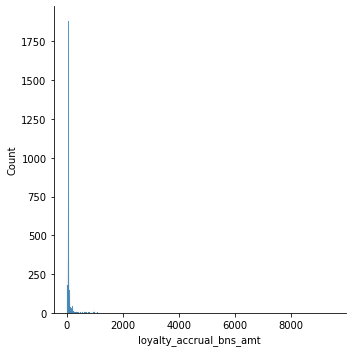

In [64]:
loyalty_accrual_bns_amt_filtered = df.query('loyalty_accrual_bns_amt < 10000')['loyalty_accrual_bns_amt']
sns.displot(loyalty_accrual_bns_amt_filtered)

In [ ]:
# Скошенное распределение с явными выбросами

## 3. Метрики

### Медианное время поездки

In [68]:
# Рассчитаю время каждой поездки, чтобы определить среднее время поездки
df['trip_duration'] = df.book_end_dttm - df.book_start_dttm

In [69]:
df.head(10)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,...,3.690479,2024-08-07 09:47:25,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN,0 days 00:20:30.014272
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,...,1.114912,2024-10-17 14:57:20,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN,0 days 00:06:54.833607
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,1.515612,2024-09-19 05:31:41,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN,0 days 00:06:50.688372
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,...,0.499411,2024-10-04 16:05:09,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN,0 days 00:02:18.562918
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,...,2.602028,2024-07-10 06:57:40,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN,0 days 00:10:05.429337
5,277397094,5247768,M,42,NaN,NaN,МОСКВА,7.49,50.0,300.0,...,0.016090,2024-09-10 09:40:18,2024-09-10 09:40:24.036000,2024-09-10 09:41:03.644495,3,2024-09-10 09:40:24.036000,0.00,NaN,NaN,0 days 00:00:39.608495
6,273528957,801272780,F,19,NaN,NaN,РЕСП ТАТАРСТАН,7.49,30.0,300.0,...,4.086853,2024-09-03 14:10:29,2024-09-03 14:10:34.524349,2024-09-03 14:21:25.119585,3,2024-09-03 14:10:34.524349,112.39,28.00,NaN,0 days 00:10:50.595236
7,265062394,866880584,M,38,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,2.370597,2024-08-03 03:09:35,2024-08-03 03:09:38.493851,2024-08-03 03:18:47.841493,5,2024-08-03 05:09:38.493851,89.90,12.99,NaN,0 days 00:09:09.347642
8,351562880,762053500,M,19,NaN,NaN,НОВОСИБИРСКАЯ ОБЛ,5.99,30.0,300.0,...,0.101272,2024-10-04 10:45:16,2024-10-04 10:45:20.457000,2024-10-04 10:47:39.863967,7,2024-10-04 14:45:20.457000,47.97,4.80,NaN,0 days 00:02:19.406967
9,269365210,161703813,M,31,UGR,MAR,ЧЕЛЯБИНСКАЯ ОБЛ,6.49,30.0,300.0,...,1.487792,2024-08-19 14:35:17,2024-08-19 14:35:20.199325,2024-08-19 14:42:53.835731,5,2024-08-19 16:35:20.199325,81.92,81.92,NaN,0 days 00:07:33.636406


In [71]:
df['trip_duration'].describe()

count                       396749
mean     0 days 00:11:26.459336646
std      0 days 00:13:10.490068392
min         0 days 00:00:02.004000
25%         0 days 00:04:45.783419
50%         0 days 00:07:46.119018
75%         0 days 00:13:22.262417
max         0 days 11:55:10.332373
Name: trip_duration, dtype: object

In [72]:
# Медианное время поездки составляет около 8 минут (7 мин 46 с)
# Максимальное значение указывает на явный выброс. Предположительно, пользователь не смог/ забыл завершить поездку

### Число поездок

In [80]:
# Посмотрю на день недели поездки, чтобы проанализировать, в какие дни больше спрос на самокаты
df['weekday'] = df.book_start_dttm.dt.weekday

In [81]:
df.head(10)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration,dow,weekday
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,...,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN,0 days 00:20:30.014272,2,2
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,...,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN,0 days 00:06:54.833607,3,3
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN,0 days 00:06:50.688372,3,3
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,...,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN,0 days 00:02:18.562918,4,4
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,...,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN,0 days 00:10:05.429337,2,2
5,277397094,5247768,M,42,NaN,NaN,МОСКВА,7.49,50.0,300.0,...,2024-09-10 09:40:24.036000,2024-09-10 09:41:03.644495,3,2024-09-10 09:40:24.036000,0.00,NaN,NaN,0 days 00:00:39.608495,1,1
6,273528957,801272780,F,19,NaN,NaN,РЕСП ТАТАРСТАН,7.49,30.0,300.0,...,2024-09-03 14:10:34.524349,2024-09-03 14:21:25.119585,3,2024-09-03 14:10:34.524349,112.39,28.00,NaN,0 days 00:10:50.595236,1,1
7,265062394,866880584,M,38,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-08-03 03:09:38.493851,2024-08-03 03:18:47.841493,5,2024-08-03 05:09:38.493851,89.90,12.99,NaN,0 days 00:09:09.347642,5,5
8,351562880,762053500,M,19,NaN,NaN,НОВОСИБИРСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-10-04 10:45:20.457000,2024-10-04 10:47:39.863967,7,2024-10-04 14:45:20.457000,47.97,4.80,NaN,0 days 00:02:19.406967,4,4
9,269365210,161703813,M,31,UGR,MAR,ЧЕЛЯБИНСКАЯ ОБЛ,6.49,30.0,300.0,...,2024-08-19 14:35:20.199325,2024-08-19 14:42:53.835731,5,2024-08-19 16:35:20.199325,81.92,81.92,NaN,0 days 00:07:33.636406,0,0


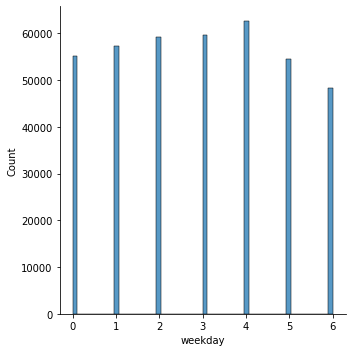

In [82]:
sns.displot(df.weekday)

In [ ]:
# Больше всего поездок совершается в пятницу (weekday 4), это число ненамного выше, чем в другие будние дни
# В выходные число поездок падает (weekday 5, 6)

In [84]:
# Посмотрю на число поездок по месяцам, чтобы проанализировать, в какие месяцы спрос на самокаты больше
df['month'] = df.book_start_dttm.dt.month

In [85]:
df.head(10)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration,dow,weekday,month
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,...,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN,0 days 00:20:30.014272,2,2,8
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,...,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN,0 days 00:06:54.833607,3,3,10
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN,0 days 00:06:50.688372,3,3,9
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,...,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN,0 days 00:02:18.562918,4,4,10
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,...,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN,0 days 00:10:05.429337,2,2,7
5,277397094,5247768,M,42,NaN,NaN,МОСКВА,7.49,50.0,300.0,...,2024-09-10 09:41:03.644495,3,2024-09-10 09:40:24.036000,0.00,NaN,NaN,0 days 00:00:39.608495,1,1,9
6,273528957,801272780,F,19,NaN,NaN,РЕСП ТАТАРСТАН,7.49,30.0,300.0,...,2024-09-03 14:21:25.119585,3,2024-09-03 14:10:34.524349,112.39,28.00,NaN,0 days 00:10:50.595236,1,1,9
7,265062394,866880584,M,38,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-08-03 03:18:47.841493,5,2024-08-03 05:09:38.493851,89.90,12.99,NaN,0 days 00:09:09.347642,5,5,8
8,351562880,762053500,M,19,NaN,NaN,НОВОСИБИРСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-10-04 10:47:39.863967,7,2024-10-04 14:45:20.457000,47.97,4.80,NaN,0 days 00:02:19.406967,4,4,10
9,269365210,161703813,M,31,UGR,MAR,ЧЕЛЯБИНСКАЯ ОБЛ,6.49,30.0,300.0,...,2024-08-19 14:42:53.835731,5,2024-08-19 16:35:20.199325,81.92,81.92,NaN,0 days 00:07:33.636406,0,0,8


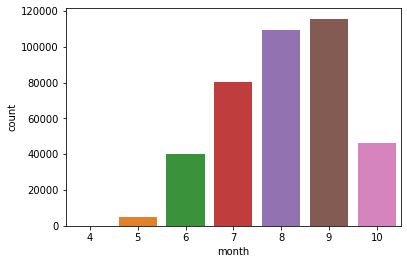

In [89]:
sns.countplot(data=df, x='month')

In [90]:
# В сентябре (month 9) наблюдается наибольший спрос на самокаты
# В более "прохладные" месяцы (month 4, 5, 6, 10) спрос на самокаты меньше, что говорит о явной сезонности сервиса

### Медианный километраж поездки

In [ ]:
# Посмотрим на медианный километраж поездки в зависимости от модели самоката

In [130]:
df_by_transport_model = df.groupby('transport_model', as_index=False).agg({'distance_km': 'median'}) \
                        .rename(columns={'distance_km':'median_distance_km'}) \
                        .sort_values('median_distance_km', ascending=False)
df_by_transport_model


,transport_model,median_distance_km
10,Max,1.892598
6,ES400,1.766420
11,SL,1.758189
13,Urban E-Bike,1.730060
2,ES,1.642680
3,ES-08S,1.590030
9,MK,1.583398
1,E,1.522292
4,ES100,1.467341
5,ES200,1.419359


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

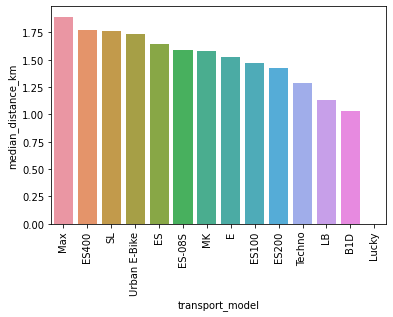

In [131]:
sns.barplot(x=df_by_transport_model.transport_model, y=df_by_transport_model.median_distance_km)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

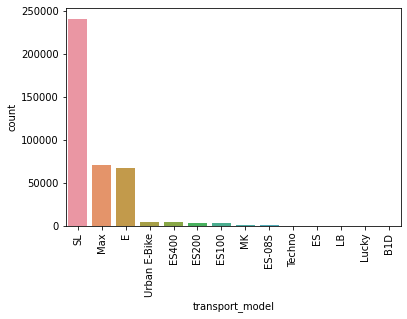

In [132]:
sns.countplot(data = df, x ='transport_model', order = df['transport_model'].value_counts().index)
plt.xticks(rotation=90)